# mock catalog

Let's look into the simplest mock galaxy shape catalog in this demo. You can find the HSC 
first-year mock catalog [here](https://hsc-release.mtk.nao.ac.jp/archive/filetree/s16a-shape-catalog/pdr1_hscwl/Shirasaki_mocks/),
which is based on the n-body/ray-tracing simulation [here](http://cosmo.phys.hirosaki-u.ac.jp/takahasi/allsky_raytracing/index.html).

What information should a mock catalog contains

$\hat{\gamma}_i = \gamma_i  + \delta \gamma_i$

+ $\hat{\gamma}$ is the measured shear (shape) of galaxy with index $i$.
+ $\gamma_i$ is the cosmic shear from simulation (n-body simulation or halo-based simulation)
+ $\delta \gamma_i$ is the shape noise from randomness of galaxy shape and photon noise

Also, the information of galaxy positions (ra,dec,$z$) should be included in the mock catalog

In [1]:
%matplotlib inline
# initialize a halo to simulate and the shear field will be added to the catalog
from splinv import hmod
z_h     =   0.2425           # halo redshift
log_m   =   14.745           # halo mass (log10)
M_200   =   10.**(log_m)     # halo mass
conc    =   4.               # halo concentration
# initial an nfw halo
halo    =   hmod.nfwTJ03(mass=M_200,conc=conc,redshift=z_h,ra=0.,dec=0.)

In [2]:
# position of galaxies
nsamp=40000
ra=np.random.rand(nsamp)*0.44-0.22
dec=np.random.rand(nsamp)*0.44-0.22
z=np.random.chisquare(5, size=nsamp)

Text(0, 0.5, '$n(z)$')

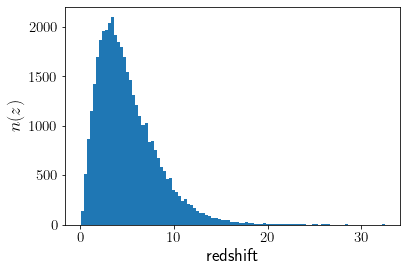

In [3]:
# distribution in redshift direction
_=plt.hist(z,bins=100);plt.xlabel('redshift');plt.ylabel(r'$n(z)$')

(Text(0.5, 0, 'ra'), Text(0, 0.5, 'dec'))

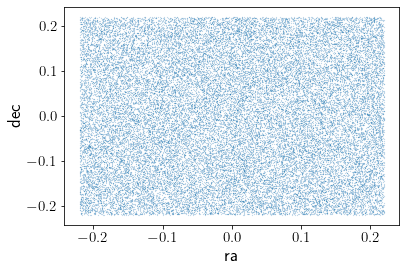

In [4]:
# galaxy distribution in transverse plane
_=plt.scatter(ra,dec,s=0.01);plt.xlabel('ra'),plt.ylabel('dec')

Text(0.5, 0, '$\\gamma_1$')

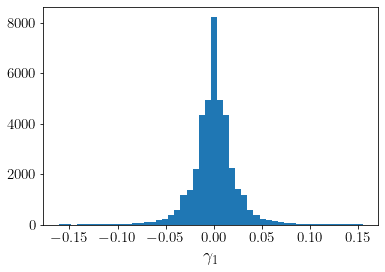

In [5]:
# simulate the lensing shear
dsigma  =  halo.DeltaSigmaComplex(ra*3600.,dec*3600.) # Delta sigma (excess surface density)
lensKer =  halo.lensKernel(z) # lensing kernel
shear   =   dsigma*lensKer
shear1  =   shear.real
shear2  =   shear.imag
plt.hist(shear1,bins=50);plt.xlabel(r'$\gamma_1$')

Text(0.5, 0, '$\\gamma_1$')

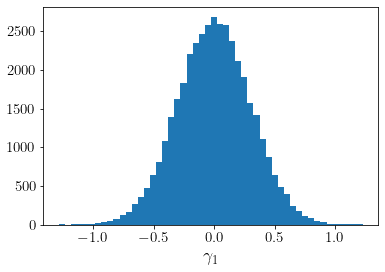

In [12]:
dg1=np.random.randn(nsamp)*0.3
dg2=np.random.randn(nsamp)*0.3
g1_mea=shear1+dg1
g2_mea=shear2+dg2
plt.hist(g1_mea,bins=50);plt.xlabel(r'$\gamma_1$')

In [11]:
import astropy.table as astTable
catalog=astTable.Table()
catalog['shear1_sim']=shear1
catalog['shear2_sim']=shear2
catalog['shear1_mea']=g1_mea
catalog['shear2_mea']=g2_mea
catalog['ra']=ra
catalog['dec']=dec
catalog['z_ture']=z
catalog

shear1_sim,shear2_sim,shear1_mea,shear2_mea,ra,dec,z_ture
float64,float64,float64,float64,float64,float64,float64
0.0012051712309330029,0.007382748924425667,-0.049605850247022854,0.07228736664034205,-0.17754825225352422,0.20888158233588747,6.0215682865054845
-0.06061716148362688,0.012136377204792497,0.01096403905723986,0.014602958531244044,0.05544921509686987,-0.0054963028733892305,2.7121389096095205
-0.011582932462182314,-0.012983223684863664,0.20014867484010135,0.4732053279226185,0.1657057307940122,0.07423203063350112,11.36931443542772
...,...,...,...,...,...,...
-0.012752010898979406,0.010558890122571352,-0.2281208999934178,0.08050191826994461,0.17447040456722404,-0.06285682471103979,8.618131368127564
-0.0006713641626609645,-0.01734863802007873,-0.06659842623328954,0.09246884046390608,0.13078060859725013,0.12581750065306443,10.002198493399103
-0.00014392319206008145,0.0075086701082463835,-0.11539846549612276,-0.01759285279851365,-0.18914780226171646,0.18555703564307388,2.3598008968628212


[shear map to power spectrum](https://github.com/LSSTDESC/NaMaster)

shear map to mass map